# 1) Data Description

Quoting the right fare to customers before starting the trip has been a challenge for various cab operators because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted.

Objective: To address this problem, a Cab operator wants to a build machine learning model for predicting the optimal trip fare based on useful features of the trip.

The data set includes the following variables:
* trip_duration: Duration of Journey [in Seconds]
* distance_traveled: Distance travelled by taxi [in Km]
* num_of_passengers: Number of passengers were in the taxi.
* tip: Tip received by driver [In INR]
* miscellaneous_fees: Any additional charges during the trip - e.g. tolls, convenience fees, GST etc.[In INR]
* surge_applied: Was there a surge pricing applied? Yes, No
* Total fare: fare for the journey

Data Source: Open Source

# 2) Importing necessary libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_log_error
import warnings
warnings.filterwarnings("ignore")

# 3) Importing Data

In [100]:
data= pd.read_csv("C:/Users/tanmo/Desktop/Regression Project/data.csv")

# 4) Data Preprocessing and Understanding

In [101]:
# Looking into data
data.head()

trip_duration  distance_traveled  num_of_passengers  tip  \
0            748               2.75                  1   24   
1           1187               3.43                  1   24   
2            730               3.12                  1    0   
3            671               5.63                  3    0   
4            329               2.09                  1   12   

   miscellaneous_fees surge_applied  total_fare  
0               6.300            No     105.300  
1              13.200            No     142.200  
2              26.625           Yes      97.875  
3               9.750            No      99.750  
4              13.200            No      70.200

In [102]:
# Checking number of rows and columns in dataset.
data.shape

(30000, 7)

In [103]:
# Checking basic info of features present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_duration       30000 non-null  int64  
 1   distance_traveled   30000 non-null  float64
 2   num_of_passengers   30000 non-null  int64  
 3   tip                 30000 non-null  int64  
 4   miscellaneous_fees  30000 non-null  float64
 5   surge_applied       30000 non-null  object 
 6   total_fare          30000 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.6+ MB


# 5) EDA

### 5.1) Handling missing values and errorneous data

In [104]:
# Basic description of numerical columns
data.describe()

trip_duration  distance_traveled  num_of_passengers           tip  \
count   30000.000000       30000.000000       30000.000000  30000.000000   
mean     1177.329533           4.759491           1.290367     13.071533   
std      4837.426424           4.941424           0.931710     20.694137   
min         0.000000           0.020000           0.000000      0.000000   
25%       442.000000           1.930000           1.000000      0.000000   
50%       700.000000           3.170000           1.000000      9.000000   
75%      1096.000000           5.660000           1.000000     20.000000   
max     86309.000000         108.920000           9.000000    950.000000   

       miscellaneous_fees    total_fare  
count        30000.000000  30000.000000  
mean            15.105067    127.265880  
std             12.491069     94.165214  
min             -0.500000      0.000000  
25%              6.000000     70.200000  
50%              9.750000    101.625000  
75%             26.450000    152.250000  
max            230.875000   2760.375000

From the above table, we can see some errorneous or insignificant data, which are records with total_fare as zero, trip_duartion as zero, num_of_passesngers as zero and negative miscellaneous_fees as price cannot be in negative. Therefore we need to drop these records.

In [105]:
# Dropping errorneous or insignificant data
data=data[(data['miscellaneous_fees']>=0)&(data['trip_duration']>0)&(data['total_fare']>0)&(data['num_of_passengers']>0)]

In [106]:
# Rechecking basic description of numerical columns
data.describe()

trip_duration  distance_traveled  num_of_passengers           tip  \
count   29838.000000       29838.000000       29838.000000  29838.000000   
mean     1179.205409           4.759892           1.296367     13.066995   
std      4850.175358           4.939429           0.930004     20.705257   
min         1.000000           0.020000           1.000000      0.000000   
25%       443.000000           1.930000           1.000000      0.000000   
50%       700.500000           3.170000           1.000000      9.000000   
75%      1096.000000           5.660000           1.000000     20.000000   
max     86309.000000         108.920000           9.000000    950.000000   

       miscellaneous_fees    total_fare  
count        29838.000000  29838.000000  
mean            15.104669    127.315069  
std             12.478885     94.065923  
min              0.000000      1.125000  
25%              6.000000     70.200000  
50%              9.750000    101.625000  
75%             26.450000    152.250000  
max            230.875000   2760.375000

In [107]:
# Basic description of categorical columns
data.describe(include='object')

surge_applied
count          29838
unique             2
top               No
freq           21489

In [108]:
# Checking missing values
data.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
tip                   0
miscellaneous_fees    0
surge_applied         0
total_fare            0
dtype: int64

### 5.2) Univariate and Bivariate Analysis

In [109]:
# Plotting box-plot to understand distribution of data
col=list(data.select_dtypes(include='number'))
for i in col:
    fig = px.box(data, x=i, orientation='h',height=250)
    fig.show()

From the above box plots we could infer that, features are positively skewed and range of distribution is quite high.

(0.0, 88000.0)

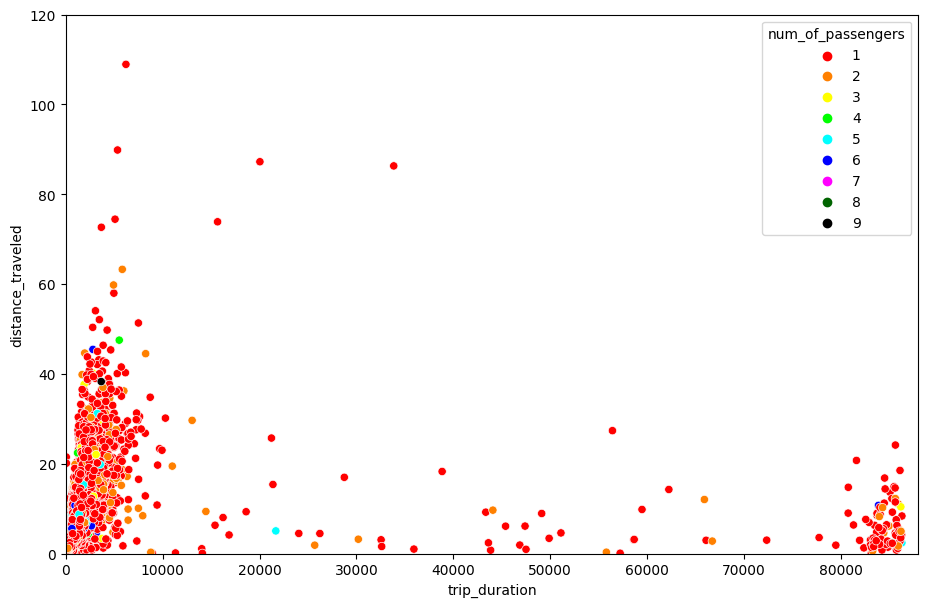

In [110]:
# Scatter plots
bright_palette = ["#FF0000", "#FF8000", "#FFFF00", "#00FF00", "#00FFFF", "#0000FF", "#FF00FF", "#006400",'#000000']
fig, ax = plt.subplots(figsize=(11, 7))  # Set the overall figure size
sns.scatterplot(x=data["trip_duration"], y=data["distance_traveled"],hue=data['num_of_passengers'],palette=bright_palette, ax=ax)
ax.set_ylim(0, 120)
ax.set_xlim(0, 88000)

From the above scatter plot, we could infer that there were trips with high trip duration, but were relatively low distance travelled. This may happen due to breaks in journey.

(0.0, 88000.0)

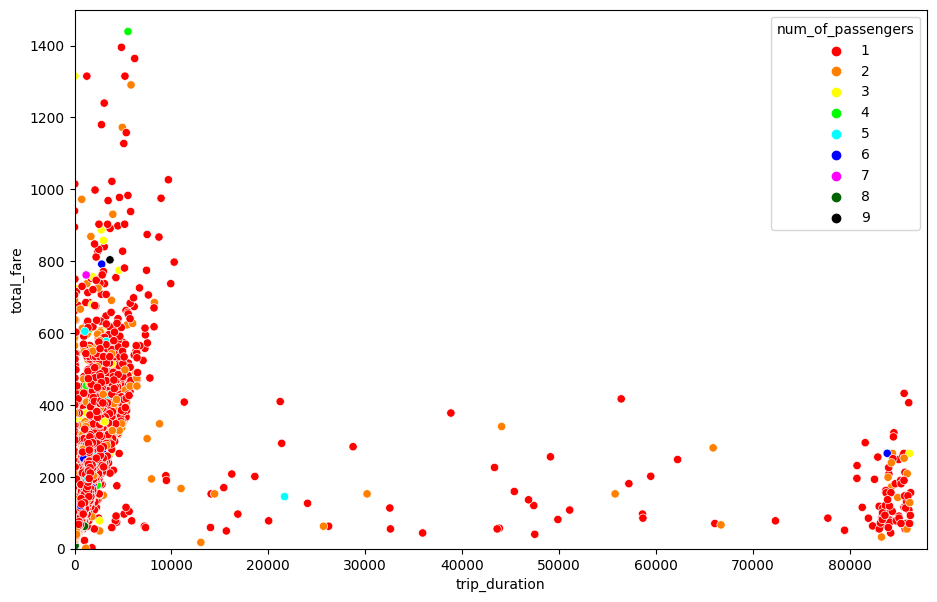

In [138]:
# Scatter plots
bright_palette = ["#FF0000", "#FF8000", "#FFFF00", "#00FF00", "#00FFFF", "#0000FF", "#FF00FF", "#006400",'#000000']
fig, ax = plt.subplots(figsize=(11, 7))  # Set the overall figure size
sns.scatterplot(x=data["trip_duration"], y=data["total_fare"],hue=data['num_of_passengers'],palette=bright_palette, ax=ax)
ax.set_ylim(0, 1500)
ax.set_xlim(0, 88000)

From the above scatter plot, we could infer that there were trips with high trip duration, but were charged relatively low total fare. This may happen due to low distance travelled as we saw in previous scatter plot.

In [112]:
fig = px.scatter(data, x="num_of_passengers", y="total_fare")
fig.show()

From the scatter plot we could infer highest bill amount is from a trip with number of passergers 1.

In [113]:
# Plotting pie charts
surge=pd.DataFrame(data.groupby("num_of_passengers")['total_fare'].count())
fig = px.pie(data, values="total_fare", names="num_of_passengers", title='Percentage of trips in each category of Number of passengers travelled')
fig.show()

From the above piechart we could infer that number of trips with number of passenger 1 is highest. 

In [114]:
surge=pd.DataFrame(data.groupby("surge_applied")['total_fare'].count())
fig = px.pie(data, values="total_fare", names="surge_applied", title='Percentage of trips in which surge were applied')
fig.show()

From the above piechart we could infer that in most number of trips surge fees were not applied. 

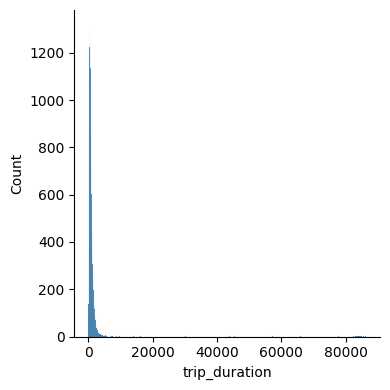

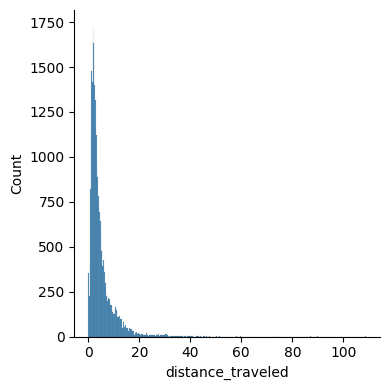

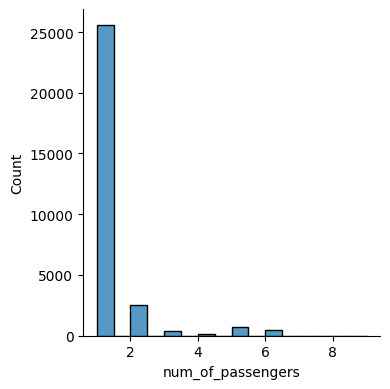

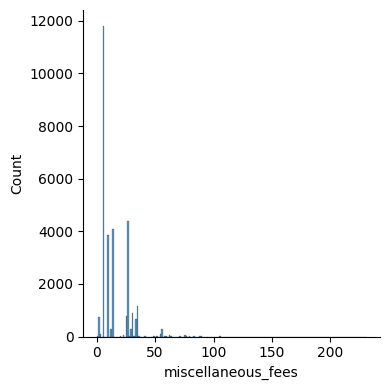

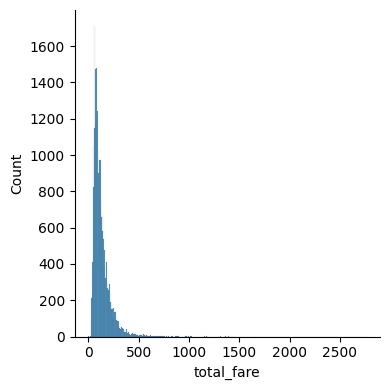

In [115]:
# Plotting Histogram of numerical variables
num=['trip_duration', 'distance_traveled', 'num_of_passengers','miscellaneous_fees', 'total_fare']
for i in num:
    sns.displot(data=data,x=i,height=4)

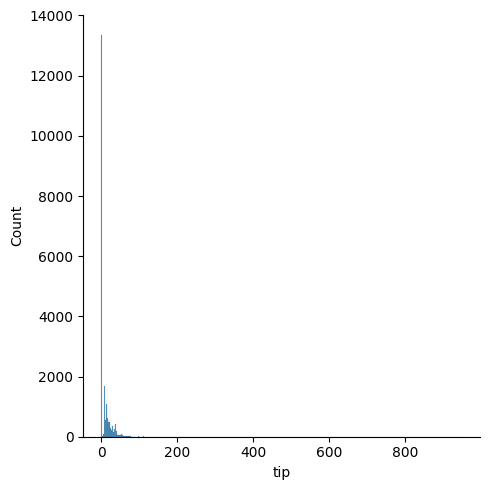

In [116]:
sns.displot(data=data,x='tip')

From the above histogram plots we could infer that all the features are right skewed.

### 5.3) Handling categorical variable

In [117]:
# Encoding of Categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['surge_applied']=encoder.fit_transform(data['surge_applied'])

### 5.4) Checking multicollinearity

<AxesSubplot: >

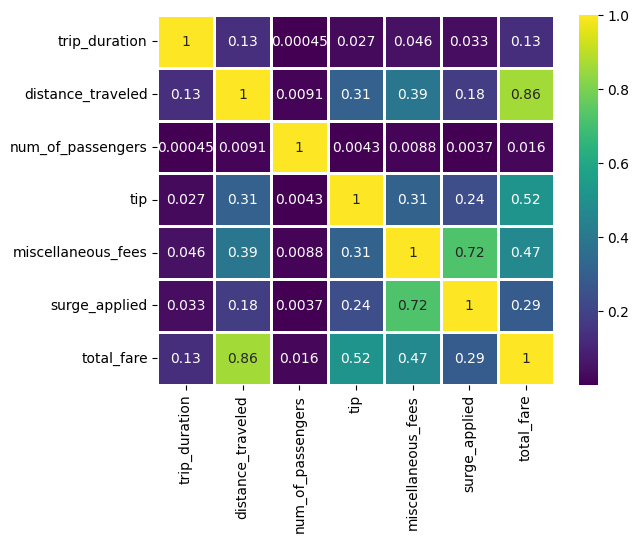

In [118]:
# Checking correlation between variables
Correlation=data.corr()
sns.heatmap(Correlation,cmap='viridis',annot=True,linewidth=2)

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = data[['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip',
       'miscellaneous_fees', 'surge_applied']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)


              feature       VIF
0       trip_duration  1.075497
1   distance_traveled  2.408632
2   num_of_passengers  1.770672
3                 tip  1.619873
4  miscellaneous_fees  5.307518
5       surge_applied  2.932162


From the above correlation matrix and VIF results, we could see that there is no multicollinearity except 'miscellaneous_fees', which is showing very moderate multicollinearity among independent variables in the graph.

# 6) Model Building

### 6.1) Building base model

In [120]:
#Dividing dataset into feature set and target variable.
X=data.drop('total_fare',axis=1)
y=data[['total_fare']]

In [121]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=list(X.columns))
X_test= pd.DataFrame(scaler.transform(X_test),columns=list(X.columns))
y_train=pd.DataFrame(y_train,columns=y.columns).reset_index(drop=True)
y_test=pd.DataFrame(y_test,columns=y.columns).reset_index(drop=True)

In [123]:
# Building statiscal model using OLS
import statsmodels.api as sm
x = sm.add_constant(X_train)

# fitting linear regression model
model = sm.OLS(y_train,x)

# view model summary
print(model.fit().summary())

# Predicting on test data
y = sm.add_constant(X_test)
y_pred = model.fit().predict(y)

# Checking RMLSE and r2_score
print(f"RMSLE using OLS:", round(np.sqrt(mean_squared_log_error(y_test,y_pred)),3))
print(f"R-squared using OLS is : ",round(r2_score(y_test,y_pred),3),"\n")

                            OLS Regression Results                            
Dep. Variable:             total_fare   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 1.848e+04
Date:                Sat, 17 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:17:20   Log-Likelihood:            -1.2176e+05
No. Observations:               23870   AIC:                         2.435e+05
Df Residuals:                   23863   BIC:                         2.436e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 34.1719      0

In [124]:
# Building other machine learning models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
models = {
    KNeighborsRegressor():'KNN',
    DecisionTreeRegressor():'Decision Tree',
    RandomForestRegressor(oob_score=True):'Random Forest',
    AdaBoostRegressor():'AdaBoost'
}
for model, name in models.items():
    # Fitting model
    model.fit(X_train,y_train)
    # Predicting on test data
    y_pred=model.predict(X_test)
    # Checking RMLSE and r2_score
    rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred))
    print(f"RMSLE using {name} is :", round(rmsle,3))
    print(f"R-squared using {name} is : ",round(r2_score(y_test,y_pred),3),"\n")

RMSLE using KNN is : 0.148
R-squared using KNN is :  0.858 

RMSLE using Decision Tree is : 0.168
R-squared using Decision Tree is :  0.762 

RMSLE using Random Forest is : 0.131
R-squared using Random Forest is :  0.879 

RMSLE using AdaBoost is : 0.615
R-squared using AdaBoost is :  0.297 



From RMLSE value of each of the model, we could infer KNN, Decision Tree and Random Forest is giving better result on test data than OLS and AdaBoost. Now, we will try increasing the performance of KNN, Decision Tree and Random Forest.

### 6.2) Skewness treatment

In [125]:
# Checking skewness in target variable
from scipy.stats import skew
skew(y_train)

array([4.23509904])

In [126]:
# Transforming target variable of training data
y_train=np.log(y_train)

In [127]:
# Rechecking skewness after transformation
from scipy.stats import skew
skew(y_train)

array([0.426037])

In [96]:
# Building model after skewness treatment
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    KNeighborsRegressor():'KNN',
    DecisionTreeRegressor():'Decision Tree',
    RandomForestRegressor(oob_score=True):'Random Forest',
}
for model, name in models.items():
    # Fitting model
    model.fit(X_train,y_train)
    # Predicting on test data
    y_pred=model.predict(X_test)
    # Retransforming predicted target variable to original form
    y_pred=np.exp(y_pred)
    # Checking RMLSE and r2_score
    rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred))
    print(f"RMSLE using {name} is :", round(rmsle,3))
    print(f"R-squared using {name} is : ",round(r2_score(y_test,y_pred),3),"\n")

RMSLE using KNN is : 0.137
R-squared using KNN is :  0.862 

RMSLE using Decision Tree is : 0.152
R-squared using Decision Tree is :  0.815 

RMSLE using Random Forest is : 0.124
R-squared using Random Forest is :  0.883 



From the RMSLE values we could infer that model performance has increased after skewness treatment.

### 6.2) Feature Selection

In [63]:
# Feature Selection using RFECV
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
# Initialize the RFECV object with the model and desired scoring metric
rfecv = RFECV(estimator=model, scoring='neg_mean_squared_error',cv=10)

# Fit the RFECV object to the training data
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features: {}".format(rfecv.n_features_))

# Print the selected features
print("Selected features: {}".format(X_train.columns[rfecv.support_]))


Optimal number of features: 5
Selected features: Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip',
       'miscellaneous_fees'],
      dtype='object')


In [128]:
X_train=X_train[['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip',
       'miscellaneous_fees']]
X_test=X_test[['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip',
       'miscellaneous_fees']]

In [129]:
# Building model using selected features
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
models = {
    KNeighborsRegressor():'KNN',
    DecisionTreeRegressor():'Decision Tree',
    RandomForestRegressor(oob_score=True):'Random Forest',
}
for model, name in models.items():
    # Fitting model
    model.fit(X_train,y_train)
    # Predicting on test data
    y_pred=model.predict(X_test)
    # Retransforming predicted target variable to original form
    y_pred=np.exp(y_pred)
    # Checking RMLSE and r2_score
    rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred))
    print(f"RMSLE using {name} is :", round(rmsle,3))
    print(f"R-squared using {name} is : ",round(r2_score(y_test,y_pred),3),"\n")

RMSLE using KNN is : 0.137
R-squared using KNN is :  0.864 

RMSLE using Decision Tree is : 0.152
R-squared using Decision Tree is :  0.809 

RMSLE using Random Forest is : 0.124
R-squared using Random Forest is :  0.883 



From the RMSLE values we could infer that model performance has almost remained after feature selection. And, Random Forest is giving the best results among all the models, we will now look to improve its performance further through Hyper prarameter tuning.

### 6.3) Hyper parameter tuning using optuna

In [131]:
# Hyper parameter tuning of Random Forest
import optuna
from sklearn.ensemble import RandomForestRegressor
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000,step=50)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    # Create and train the Random Forest model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        oob_score=True
    )

    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Retransforming predicted target variable to original form
    y_pred=np.exp(y_pred)
    # Calculate the performance metric
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

    return rmsle

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and their performance metric
best_params = study.best_params
best_value = study.best_value
print("Best Params:", best_params)
print("Best Value:", best_value)

[I 2023-06-17 02:25:02,209] A new study created in memory with name: no-name-e6778c03-a3c2-4ee8-b788-8d63530877e5
[I 2023-06-17 02:25:13,748] Trial 0 finished with value: 0.1220793191237542 and parameters: {'n_estimators': 250, 'max_depth': 12}. Best is trial 0 with value: 0.1220793191237542.
[I 2023-06-17 02:25:37,991] Trial 1 finished with value: 0.1289744845363664 and parameters: {'n_estimators': 750, 'max_depth': 8}. Best is trial 0 with value: 0.1220793191237542.
[I 2023-06-17 02:26:16,996] Trial 2 finished with value: 0.12335588359784137 and parameters: {'n_estimators': 600, 'max_depth': 15}. Best is trial 0 with value: 0.1220793191237542.
[I 2023-06-17 02:27:00,613] Trial 3 finished with value: 0.12144095592633504 and parameters: {'n_estimators': 950, 'max_depth': 11}. Best is trial 3 with value: 0.12144095592633504.
[I 2023-06-17 02:27:37,940] Trial 4 finished with value: 0.12156451113246125 and parameters: {'n_estimators': 1000, 'max_depth': 10}. Best is trial 3 with value: 0.

[I 2023-06-17 02:49:23,844] Trial 45 finished with value: 0.12215983892578328 and parameters: {'n_estimators': 800, 'max_depth': 10}. Best is trial 26 with value: 0.12079512357711866.
[I 2023-06-17 02:50:02,467] Trial 46 finished with value: 0.12084153908195502 and parameters: {'n_estimators': 900, 'max_depth': 11}. Best is trial 26 with value: 0.12079512357711866.
[I 2023-06-17 02:50:45,070] Trial 47 finished with value: 0.12232423526791861 and parameters: {'n_estimators': 900, 'max_depth': 12}. Best is trial 26 with value: 0.12079512357711866.
[I 2023-06-17 02:51:34,289] Trial 48 finished with value: 0.12266149587019758 and parameters: {'n_estimators': 950, 'max_depth': 13}. Best is trial 26 with value: 0.12079512357711866.
[I 2023-06-17 02:52:09,130] Trial 49 finished with value: 0.12409176183750517 and parameters: {'n_estimators': 1000, 'max_depth': 9}. Best is trial 26 with value: 0.12079512357711866.
[I 2023-06-17 02:53:02,118] Trial 50 finished with value: 0.1232746863564416 and

[I 2023-06-17 03:15:53,134] Trial 90 finished with value: 0.12196946961182378 and parameters: {'n_estimators': 550, 'max_depth': 12}. Best is trial 26 with value: 0.12079512357711866.
[I 2023-06-17 03:16:16,800] Trial 91 finished with value: 0.12112919667606892 and parameters: {'n_estimators': 550, 'max_depth': 11}. Best is trial 26 with value: 0.12079512357711866.
[I 2023-06-17 03:16:36,168] Trial 92 finished with value: 0.1219903501972184 and parameters: {'n_estimators': 500, 'max_depth': 10}. Best is trial 26 with value: 0.12079512357711866.
[I 2023-06-17 03:16:57,771] Trial 93 finished with value: 0.12188994138518441 and parameters: {'n_estimators': 500, 'max_depth': 11}. Best is trial 26 with value: 0.12079512357711866.
[I 2023-06-17 03:17:17,149] Trial 94 finished with value: 0.12132345977370391 and parameters: {'n_estimators': 450, 'max_depth': 11}. Best is trial 26 with value: 0.12079512357711866.
[I 2023-06-17 03:17:40,882] Trial 95 finished with value: 0.12215083589801688 and

Best Params: {'n_estimators': 900, 'max_depth': 11}
Best Value: 0.12079512357711866


### 6.4) Final model building using tuned hyper parameters.

In [132]:
# Final model building using Random Forest.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=900, max_depth=11)
# Fitting model
model.fit(X_train,y_train)
# Predicting on test data
y_pred=model.predict(X_test)
y_pred=np.exp(y_pred)
# Checking RMLSE and r2_score
rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred))
print(f"RMSLE using {name} is :", round(rmsle,3))
print(f"R-squared using {name} is : ",round(r2_score(y_test,y_pred),3),"\n")

RMSLE using Random Forest is : 0.121
R-squared using Random Forest is :  0.884 



From the RMSLE score of the final model, we can infer that there was slight improvement in the accuracy of the model after Hyper parameter tuning.